In [12]:
include("../coevolution_network_base.jl")
using .CoevolutionNetworkBase
using Statistics
using Plots
theme(:dracula)

In [59]:
# Parameters
L = 40.0
dx = 0.1
x = -L/2:dx:L/2-dx
r = 3.0
M = 15
beta = 2.5
alpha = 0.0
gamma = 1.0
D = 0.008
Nh = 2 * 10^6
stochastic = true
sigma = 3.0

# Initialize viral and immune densities
viral_density = zeros(Float64, length(x))
viral_density[Int(round(length(x)/2))] = 100/dx

# initial_variance = 0.3
# viral_density .= 100/sqrt(2 * pi * initial_variance) .* exp.(-x.^2/2/initial_variance)
viral_density2 = zeros(Float64, length(x))
immune_density = zeros(Float64, length(x))

# Create Population instances
population = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density, immune_density;stochastic=stochastic, sigma=sigma)
population2 = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density2, immune_density; stochastic=stochastic, sigma=sigma)
populations = [population, population2]

# populations[1] = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density, immune_density;stochastic=true)

# Create Network instance
migration_matrix = 1e-3 * ones(size(populations,1),size(populations,1)) # Define an appropriate migration matrix
println(size(migration_matrix,1))
network = Network(populations, migration_matrix);

# Create Simulation instance
dt = 0.05 # Define an appropriate time step size
duration = 80.0 # Define an appropriate simulation duration
simulation = Simulation(network, dt, duration; thin_by=1);

@time run_simulation!(simulation);

2
  0.228693 seconds (3.20 k allocations: 10.169 MiB)


┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots C:\Users\danws\.julia\packages\Plots\sxUvK\src\utils.jl:106


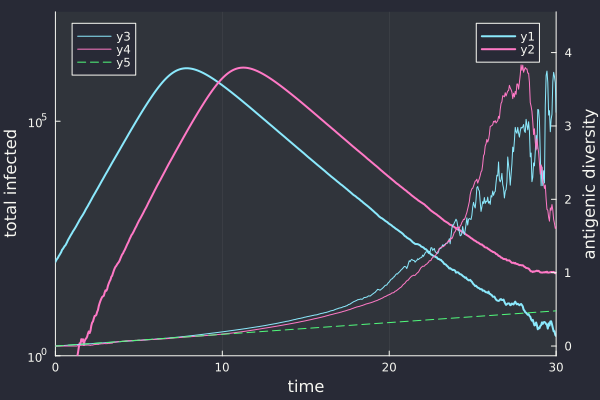

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots C:\Users\danws\.julia\packages\Plots\sxUvK\src\utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots C:\Users\danws\.julia\packages\Plots\sxUvK\src\utils.jl:106


In [60]:
total_infected_per_deme = calculate_total_infected_per_deme(simulation)
antigenic_variance_per_deme = calculate_antigenic_variance_per_deme(simulation)

p = plot(xlabel="time", ylabel="total infected", xlims=(0,30))
plot!(p, simulation.duration_times, transpose(total_infected_per_deme), lw = 2, yscale=:log10, ylims=(1,maximum(total_infected) * 10))

p2 = twinx(p)
plot!(p2, simulation.duration_times, transpose(antigenic_variance_per_deme), ylabel="antigenic diversity", xlims=(0,30))
plot!(p2, simulation.duration_times, 2 * D * simulation.duration_times, linestyle=:dash)
display(p)

In [50]:
typeof(3)

Int64